# 문제풀이 Overview
* 이번 문제풀이에서는 총 5개의 문제와 1개의 자유주제를 다룹니다.
* 문제를 본격적으로 풀기 전에 아래 코드를 실행해 `pandas` 라이브러리를 임포트하고 데이터를 읽어와주세요.

In [ ]:
import pandas as pd

In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/tips.csv')

# 데이터 설명
이 데이터는 웨이터가 자신이 받은 팁과, 팁을 받았을 때의 영수금액, 계산한 사람의 정보 등을 기록한 것입니다. 이번 섹션에서 배운 `pivot`, `pivot_table` 함수를 이용하여 **어떤 경우 팁을 많이 받을 수 있는지** 분석해봅시다.

💡 `pivot`, `pivot_table` 사용이 아직 익숙하지 않은 분들은 구글 스프레드 시트나, `groupby` 함수를 사용하여 분석해도 좋습니다. '모로 가도 서울만 가면 된다'라는 말도 있잖아요!

**컬럼 상세**

- total_bill: 영수 금액 (달러) *팁을 포함하지 않음*
- tip: 팁 (달러)
- sex: 계산한 사람의 성별
- smoker: 일행 중에 흡연자가 있었는지 여부
- day: 요일
- time: 점심 또는 저녁
- size: 일행의 인원 (명)

**References**
- Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

# 데이터 미리보기

In [ ]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


# Q1. 탐색적 데이터 분석 
[탐색적 데이터 분석(EDA, Exploratory Data Analysis)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)이란 본격적인 데이터 분석을 시작하기 전에, 그래프나 기초 통계를 이용하여 주어진 자료를 파악하는 과정입니다.

`describe()`, `unique()` 등 지금까지 배운 함수를 이용하여 데이터를 자유롭게 탐색해봅시다.

**아래의 간단한 질문들에 답하며 EDA를 시작해 볼까요?**

- 총 몇 개의 팁 데이터가 들어있나요? 244개
- `sex`, `smoker`, `day`, `time` 데이터에는 각각 어떤 데이터들이 들어있나요?
- 팁은 평균적으로 얼마를 받았나요? 2.99 달러

In [ ]:
# Answer 1. 총 244개의 팁 데이터가 있으며 평균적으로 약 3달러의 팁을 받았다
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
print(tips['sex'].unique())
print(tips['smoker'].unique())
print(tips['day'].unique())
print(tips['time'].unique())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


# Q2. 팁의 비율
평균적으로 총 영수 금액의 몇 퍼센트를 팁으로 받고 있나요?  

아래 단계에 따라 더미로 주어진 코드들을 수정하면서 진행해주세요.

* Step 1. 영수 금액 대비 팁의 비율(%)을 `tip_pct` 라는 새로운 컬럼에 저장
* Step 2. `tip_pct`의 평균을 계산하여 정수로 반올림  
* Step 3. 2번의 결과를 `tip_pct_avg` 라는 변수에 저장 

Tip.
* [파이썬의 반올림 내장 함수](https://docs.python.org/3/library/functions.html#round)

In [ ]:
# Answer 
tips['tip_pct'] = tips['tip']*100/tips['total_bill'] # Step 1
tip_pct_avg = round(tips['tip_pct'].mean())  # Step 2, 3
tip_pct_avg

16

In [ ]:
print(f"팁은 평균적으로 영수 금액의 {tip_pct_avg}% 입니다")

팁은 평균적으로 영수 금액의 16% 입니다


# Q3. 영수 금액과 팁의 관계
영수 금액이 많을수록 팁을 많이 줄까요? x 축을 `total_bill`, y 축을 `tip`으로 하는 산포도를 그려서 확인해봅시다.  

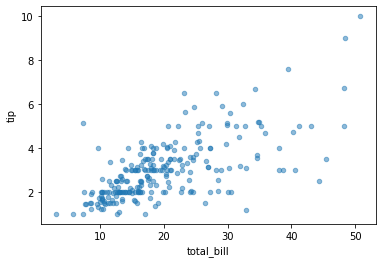

In [ ]:
# Answer
tips.plot.scatter(x='total_bill',y='tip',alpha=0.5)

### 질문
* 질문: 영수 금액이 많을수록 팁을 많이 주나요?  
* 답변: 산포도 상으로 대체로 정비례하는 경향을 보이나 반드시 영수 금액이 많다고 팁을 많이 주거나 영수 금액이 적다고 팁을 적게 주는 것도 아니다

# Q4. 웨이터 A에게 출근일과 시간대 추천하기

웨이터 A는 일주일에 딱 한 타임(ex. 금요일 저녁 시간대)만 일 할 수 있습니다. 그리고 이왕에 하는 일이라면 팁을 많이 받을 수 있는 날에 출근하고 싶습니다.  

`pivot_table` 함수를 이용하여 팁을 최대로 받을 수 있는 출근일, 시간대를 계산해보고 웨이터 A에게 알려줍시다.  

In [ ]:
# Answer. groupby 사용
tips.groupby(['day','time'])['tip'].sum()

day   time  
Fri   Dinner     35.28
      Lunch      16.68
Sat   Dinner    260.40
Sun   Dinner    247.39
Thur  Dinner      3.00
      Lunch     168.83
Name: tip, dtype: float64

In [ ]:
# Answer. Pivotting
tips.pivot_table(index='day',columns='time',values='tip',aggfunc='sum')

time,Dinner,Lunch
day,,
Fri,35.28,16.68
Sat,260.40,NaN
Sun,247.39,NaN
Thur,3.00,168.83


### 웨이터 A의 질문
* 웨이터 A: 일주일에 딱 한 타임만 출근할 수 있습니다. 어떤 요일과 시간대에 출근해야 팁을 많이 받을 수 있을까요? 얼마나 받을 수 있나요?   
* 답변: 토요일 저녁, 260달러 받을 수 있다

# Q5. 웨이터 B에게 출근일 추천하기

웨이터 B는 일주일에 딱 하루만 일 할 수 있습니다. 웨이터 B는 효율을 중시하는 사람입니다. 딱 한 팀만 받아도 괜찮으니 손님 1명 당 팁을 많이 받을 수 있는 날에 일하고 싶습니다.

`pivot_table` 함수 또는 `groupby` 를 이용하여 손님 1명 당 팁을 많이 받을 수 있는 날을 구해주세요.

In [ ]:
# Answer groupby 사용
# 손님 1명 당 팁 = 팁/size 가 가장 큰 날: 금요일

tips_daily = tips.groupby(['day'])['tip','size'].sum()
tips_daily['daily_person'] = tips_daily['tip']/tips_daily['size']
tips_daily

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,tip,size,daily_person
day,,,
Fri,51.96,40,1.299000
Sat,260.40,219,1.189041
Sun,247.39,216,1.145324
Thur,171.83,152,1.130461


In [ ]:
# Answer pivotting
tips_daily_pv = tips.pivot_table(index='day',values=['tip','size'], aggfunc='sum')
tips_daily_pv['daily_person'] = tips_daily_pv['tip']/tips_daily_pv['size']
tips_daily_pv

,size,tip,daily_person
day,,,
Fri,40,51.96,1.299000
Sat,219,260.40,1.189041
Sun,216,247.39,1.145324
Thur,152,171.83,1.130461


### 웨이터 B의 질문
* 웨이터 B: 일주일에 하루만 출근할 수 있습니다. 어떤 요일에 출근해야 제공한 서비스 대비 팁을 많이 받을 수 있을까요? 손님 한 명 당 팁을 많이 받을 수 있는 날을 추천해주세요.  
* 답변:  금요일에 출근하세요 손님 당 1.29달러를 받을 수 있답니다

# Q6. 추가 분석 - 1. 성별과 팁의 관계

성별에 따라 팁의 액수가 다를까?

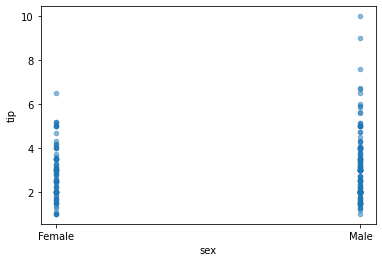

In [ ]:
# 추가 분석
tips.plot.scatter(x='sex',y='tip',alpha=0.5)

# 수고하셨습니다!